reading the file

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
df=pd.read_csv("train (1).csv",skipinitialspace=True)

In [38]:
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


10 features and 1 target variable

target variable is given so it is a supervised learning problem

Target variavle contains the yes/no so its a classification probelm statement (binary)

In [39]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

no null values

In [40]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [41]:
df=df.drop_duplicates()

In [42]:
df.shape

(45205, 11)

In [43]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


<AxesSubplot:>

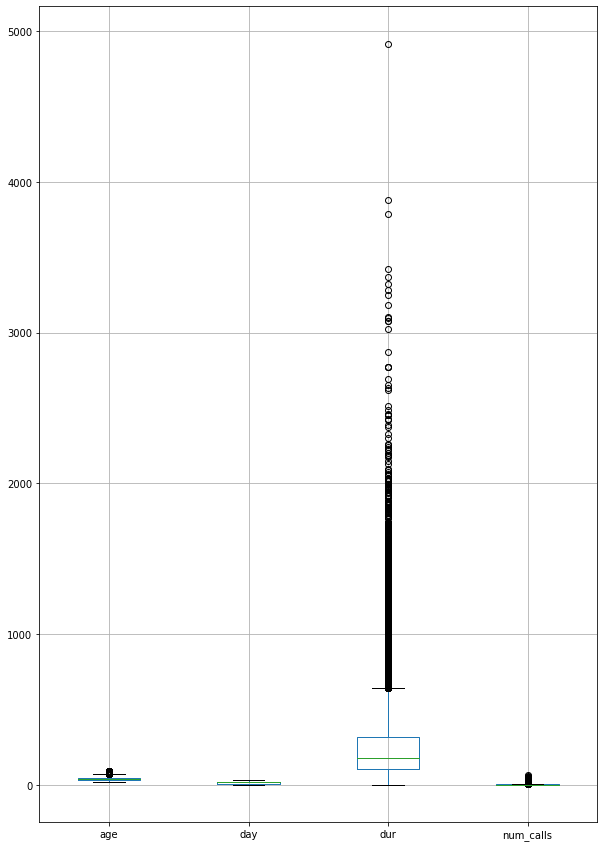

In [44]:
df.boxplot(column=['age','day','dur','num_calls'],figsize=(10,15))

Thus age,day,dur,num_calls having outliers so we need to remove because it may create a problems.

# Handling the outlier

**Age**

In [45]:
iqr=df['age'].quantile(0.75)-df['age'].quantile(0.25)
# print(iqr)
upper_thereshold=df['age'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['age'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

10.5 70.5


we have outlier in the age column so we need to clip it by lower and upper thershold

In [46]:
# df.age=df.age.clip(10.5,70.5)

age column is clipped

**Day**

In [47]:
iqr=df['day'].quantile(0.75)-df['day'].quantile(0.25)
# print(iqr)
upper_thereshold=df['day'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['day'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-11.5 40.5


dont have any outlier in day column

**dur**

In [48]:
iqr=df['dur'].quantile(0.75)-df['dur'].quantile(0.25)
# print(iqr)
upper_thereshold=df['dur'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['dur'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-221.0 643.0


having outlier in dur column

In [49]:
df.dur=df.dur.clip(-221.0,643.0)

dur column is clipped with upper and lower threshold

**num_calls**

In [50]:
iqr=df['num_calls'].quantile(0.75)-df['num_calls'].quantile(0.25)
# print(iqr)
upper_thereshold=df['num_calls'].quantile(0.75)+(1.5*iqr)
lower_thereshold=df['num_calls'].quantile(0.25)-(1.5*iqr)

print(lower_thereshold,upper_thereshold)

-2.0 6.0


In [51]:
df.num_calls=df.num_calls.clip(-2.0,6.0)

In [52]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45205 non-null  int64  
 1   job             45205 non-null  object 
 2   marital         45205 non-null  object 
 3   education_qual  45205 non-null  object 
 4   call_type       45205 non-null  object 
 5   day             45205 non-null  int64  
 6   mon             45205 non-null  object 
 7   dur             45205 non-null  float64
 8   num_calls       45205 non-null  float64
 9   prev_outcome    45205 non-null  object 
 10  y               45205 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.1+ MB


In [54]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643.0,3.0,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,643.0,5.0,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508.0,4.0,unknown,no


In [55]:
df.dtypes

age                 int64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

if any unknown values we need to fill

unknown is less we can go with mode.

In [56]:
df["job"].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [57]:
df["job"]=df["job"].replace("unknown",np.nan)

In [58]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [59]:
df["education_qual"]=df["education_qual"].replace("unknown",np.nan)

In [60]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

no use in impututation the unknown value  in call_type

In [61]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

no unknown value

In [62]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [63]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [64]:
df["education_qual"]=df["education_qual"].fillna("secondary")

In [65]:
df["education_qual"].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [66]:
df["job"]=df["job"].fillna("blue-collar")

In [67]:
df["job"].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [68]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Target column

encoding

In [69]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

[]

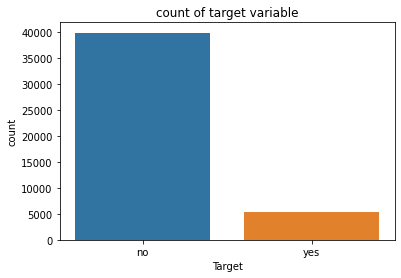

In [70]:
sns.countplot(x=df.y,data=df)
plt.xlabel("Target")
plt.title("count of target variable")
plt.plot()

In [71]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [72]:
df[df["prev_outcome"]=="success"].y.value_counts()

yes    978
no     533
Name: y, dtype: int64

In [73]:
df[df["prev_outcome"]=="failure"].y.value_counts()

no     4283
yes     618
Name: y, dtype: int64

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
# values=["success","failure","other"]
# for i in values:
#   print("% of +ve conversation if prev_outcome",i,len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["prev_outcome"]=="success"])
#   print("over all yes % if prev_outcome",i,len(df[df["prev_outcome"]==i][df["y"]=="yes"])/len(df[df["y"]=="yes"]))

encoding for target variable

In [76]:
df["Target"]=df["y"].map({'yes': 1, 'no': 0})

# eda

In [77]:
df.groupby("prev_outcome")["Target"].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: Target, dtype: float64

In [78]:
df.groupby("marital")["Target"].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: Target, dtype: float64

In [79]:
df.groupby("education_qual")["Target"].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: Target, dtype: float64

In [80]:
df.groupby("job")["Target"].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: Target, dtype: float64

In [81]:
df.groupby("mon")["Target"].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: Target, dtype: float64

In [82]:
df.groupby("call_type")["Target"].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: Target, dtype: float64

distribution of feature

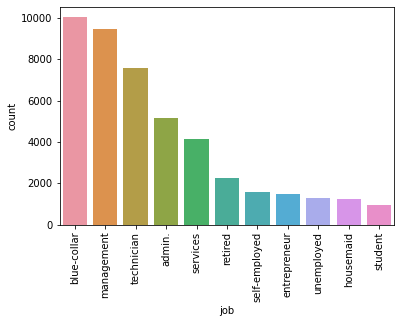

In [83]:
df_eda=pd.DataFrame(df.job.value_counts()).sort_values("job", ascending=False).reset_index()
df_eda.rename(columns={"index":"job","job":"count"},inplace=True)
bar=sns.barplot(x=df_eda["job"],y=df_eda["count"],data=df_eda)
bar.tick_params(axis="x",rotation=90)

<AxesSubplot:ylabel='job'>

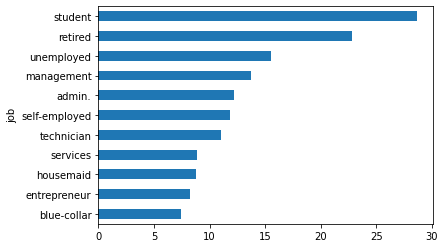

In [84]:
(df.groupby("job")["Target"].mean()*100).sort_values().plot(kind="barh")

In [85]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

<AxesSubplot:ylabel='education_qual'>

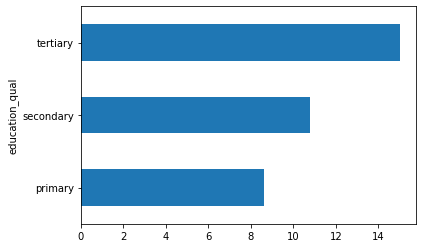

In [86]:
(df.groupby("education_qual")["Target"].mean()*100).sort_values().plot(kind="barh")

In [87]:
df["education_qual"].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

<AxesSubplot:ylabel='marital'>

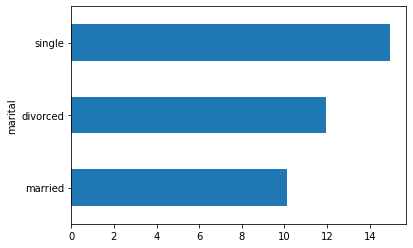

In [88]:
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")

In [89]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

<AxesSubplot:ylabel='call_type'>

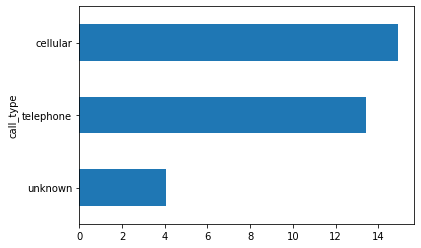

In [90]:
(df.groupby("call_type")["Target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='mon'>

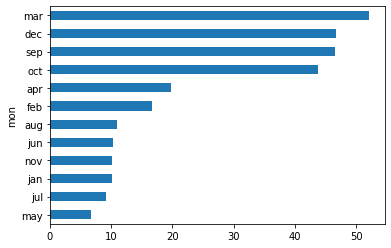

In [91]:
(df.groupby("mon")["Target"].mean()*100).sort_values().plot(kind="barh")

In [92]:
df["mon"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

<AxesSubplot:ylabel='marital'>

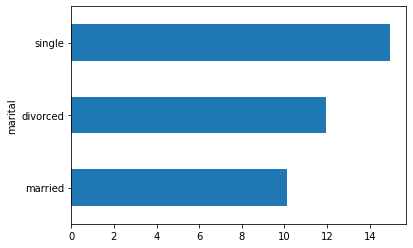

In [93]:
(df.groupby("marital")["Target"].mean()*100).sort_values().plot(kind="barh")

In [94]:
df["prev_outcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

<AxesSubplot:ylabel='prev_outcome'>

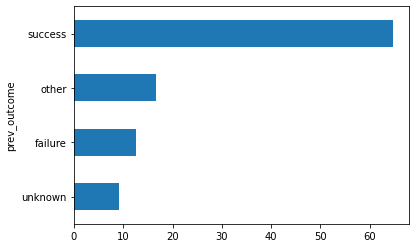

In [95]:
(df.groupby("prev_outcome")["Target"].mean()*100).sort_values().plot(kind="barh")

continuous features

<AxesSubplot:ylabel='day'>

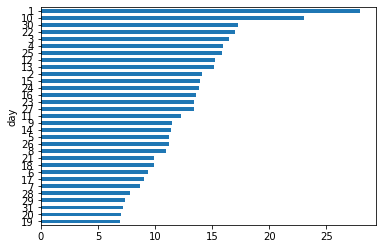

In [96]:
(df.groupby("day")["Target"].mean()*100).sort_values().plot(kind="barh")

In [97]:
df["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

<AxesSubplot:ylabel='age'>

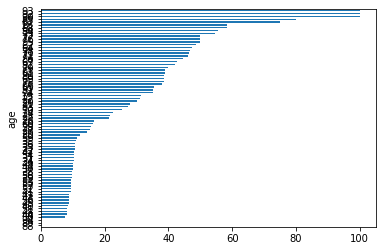

In [98]:
(df.groupby("age")["Target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:xlabel='y', ylabel='day'>

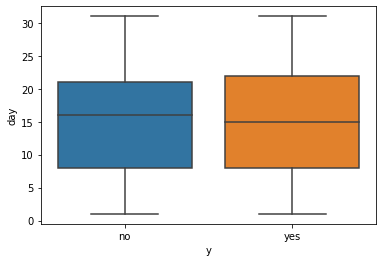

In [99]:
sns.boxplot(x='y',y='day',data=df)

In [100]:
df["age"]

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45205, dtype: int64

In [101]:
df["y"]

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45205, dtype: object

In [102]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'Target'],
      dtype='object')

<AxesSubplot:xlabel='y', ylabel='age'>

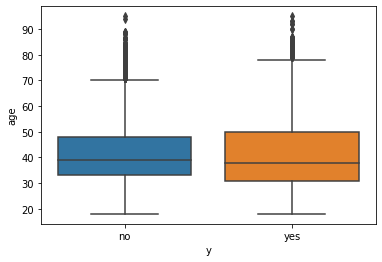

In [103]:
sns.boxplot(x='y',y='age',data=df)

<AxesSubplot:xlabel='y', ylabel='dur'>

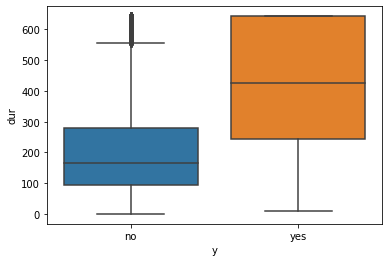

In [104]:
sns.boxplot(x='y',y='dur',data=df)

<AxesSubplot:xlabel='y', ylabel='num_calls'>

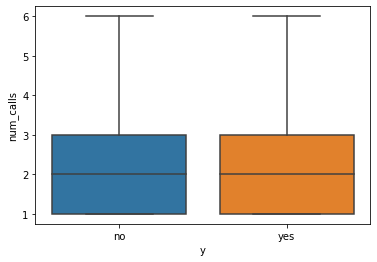

In [105]:
sns.boxplot(x='y',y='num_calls',data=df)

In [106]:
df=df.drop(["y"],axis=1)

In [107]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643.0,3.0,unknown,1
45207,71,retired,divorced,primary,cellular,17,nov,456.0,2.0,unknown,1
45208,72,retired,married,secondary,cellular,17,nov,643.0,5.0,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508.0,4.0,unknown,0


# Features Encoding

In [108]:
# encoding
df["job"]=df.job.map({'blue-collar': 1, 'entrepreneur': 2,'housemaid': 3,'services': 4,'technician': 5,'self-employed': 6,'admin.': 7,'management': 8,'unemployed': 9,'retired': 10,'student': 11})


In [109]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Target
0,58,8,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44,5,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33,2,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47,1,married,secondary,unknown,5,may,92.0,1.0,unknown,0
4,33,1,single,secondary,unknown,5,may,198.0,1.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,married,tertiary,cellular,17,nov,643.0,3.0,unknown,1
45207,71,10,divorced,primary,cellular,17,nov,456.0,2.0,unknown,1
45208,72,10,married,secondary,cellular,17,nov,643.0,5.0,success,1
45209,57,1,married,secondary,telephone,17,nov,508.0,4.0,unknown,0


In [110]:
df["job"].unique()

array([ 8,  5,  2,  1, 10,  7,  4,  6,  9,  3, 11])

In [111]:
df["education_qual"]=df["education_qual"].map({'primary': 1, 'secondary': 2,'tertiary': 3})

In [112]:
df["education_qual"].unique()

array([3, 2, 1])

In [113]:
df["marital"]=df["marital"].map({'married': 1, 'divorced': 2,'single': 3})

In [114]:
df["marital"].unique()

array([1, 3, 2])

In [115]:
df["call_type"]=df["call_type"].map({'unknown': 1, 'telephone': 2,'cellular': 3})

In [116]:
df["call_type"].unique()

array([1, 3, 2])

In [117]:
df["mon"]=df.mon.map({'may': 1, 'jul': 2,'jan': 3,'nov': 4,'jun': 5,'aug': 6,'feb': 7,'apr': 8,'oct': 9,'sep': 10,'dec': 11,'mar': 12})


In [118]:
df["mon"].unique()

array([ 1,  5,  2,  6,  9,  4, 11,  3,  7, 12,  8, 10])

In [119]:
df["prev_outcome"]=df["prev_outcome"].map({'unknown': 1, 'failure': 2,'other': 3,'success': 4})

In [120]:
df["prev_outcome"].unique()

array([1, 2, 3, 4])

In [121]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Target
0,58,8,1,3,1,5,1,261.0,1.0,1,0
1,44,5,3,2,1,5,1,151.0,1.0,1,0
2,33,2,1,2,1,5,1,76.0,1.0,1,0
3,47,1,1,2,1,5,1,92.0,1.0,1,0
4,33,1,3,2,1,5,1,198.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,1,3,3,17,4,643.0,3.0,1,1
45207,71,10,2,1,3,17,4,456.0,2.0,1,1
45208,72,10,1,2,3,17,4,643.0,5.0,4,1
45209,57,1,1,2,2,17,4,508.0,4.0,1,0


In [122]:
# df=df.drop(["y"],axis=1)

# splitting the data

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = df[['age', 'job', 'marital','education_qual', 'call_type', 'day', 'mon','dur', 'num_calls', 'prev_outcome']]
y = df['Target']# target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Scaling

In [125]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTEENN to balance the imbalance data

In [126]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN(sampling_strategy="all")
x_smt,y_smt=smt.fit_resample(X_train,y_train)


In [127]:
x_smt.shape

(51512, 10)

In [128]:
y_smt.shape

(51512,)

# Model

# **LogisticRegression**

In [129]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(x_smt,y_smt)

LogisticRegression()

In [130]:
log_reg.predict_proba(X_test)

array([[5.52851828e-02, 9.44714817e-01],
       [6.52264576e-01, 3.47735424e-01],
       [1.82109370e-01, 8.17890630e-01],
       ...,
       [9.18906578e-01, 8.10934219e-02],
       [9.74979727e-01, 2.50202727e-02],
       [8.11616791e-04, 9.99188383e-01]])

In [131]:
log_reg.predict(X_test)

array([1, 0, 1, ..., 0, 0, 1])

train roc_auc_score

In [132]:

from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [156]:
y_pred_LR=log_reg.predict(X_test)
y_pred_LR

array([1, 0, 1, ..., 0, 0, 1])

In [133]:
roc_auc_score(y_smt, log_reg.predict_proba(x_smt)[:,1])

0.9350804398359864

test roc_auc_score

In [134]:
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

0.8624800793930834

# KNeighborsClassifier

In [135]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(x_smt,y_smt)

KNeighborsClassifier()

In [136]:
y_pred_knn=classifier.predict(X_test)
y_pred_knn
y_pred_train=classifier.predict(x_smt)


In [137]:
print(roc_auc_score(y_smt,y_pred_train))

0.9884824672686866


In [138]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
print(roc_auc_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84      9967
           1       0.29      0.78      0.42      1335

    accuracy                           0.75     11302
   macro avg       0.62      0.76      0.63     11302
weighted avg       0.88      0.75      0.79     11302

[[7377 2590]
 [ 290 1045]]
0.7614570028660123


# DecisionTreeClassifier

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_smt,y_smt)

y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 0, ..., 0, 0, 1])

In [140]:
score=roc_auc_score(y_test,y_pred_dt)
score

0.7947019170754125

In [141]:
acc = roc_auc_score(y_smt, dt.predict(x_smt))
print("Train set accuracy:",acc)
acc = roc_auc_score(y_test, y_pred_dt)
print("Test set auc:",acc)

Train set accuracy: 1.0
Test set auc: 0.7947019170754125


In [142]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(x_smt, y_smt)
  trainAccuracy = accuracy_score(y_smt, dt.predict(x_smt))
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt, x_smt, y_smt, cv=10)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.779274732101258  Cross val score :  0.7790998868337692
Depth  :  2  Training Accuracy :  0.7977752756639229  Cross val score :  0.7975421765779063
Depth  :  3  Training Accuracy :  0.8515685665476006  Cross val score :  0.8512384000091643
Depth  :  4  Training Accuracy :  0.8665553657400218  Cross val score :  0.8638957407112651
Depth  :  5  Training Accuracy :  0.8752911942848268  Cross val score :  0.8741069921296111
Depth  :  6  Training Accuracy :  0.8909574468085106  Cross val score :  0.88837573826345
Depth  :  7  Training Accuracy :  0.9072060879018481  Cross val score :  0.9027025371061038
Depth  :  8  Training Accuracy :  0.9172231712998913  Cross val score :  0.9097496709617984
Depth  :  9  Training Accuracy :  0.9294727442149402  Cross val score :  0.9212226851567145
Depth  :  10  Training Accuracy :  0.9388103742817208  Cross val score :  0.9269108445143015
Depth  :  20  Training Accuracy :  0.9977480975306725  Cross val score :  0.952400

# feature importance

In [143]:
import matplotlib.pyplot as plt 

[(0.15128716917391216, 'age'),
 (0.0634937018153131, 'job'),
 (0.02386975819796421, 'marital'),
 (0.02489577672643262, 'education_qual'),
 (0.025508954637576478, 'call_type'),
 (0.12009373994745574, 'day'),
 (0.11764376351209492, 'mon'),
 (0.305117470311007, 'dur'),
 (0.04763205894397576, 'num_calls'),
 (0.12045760673426803, 'prev_outcome')]

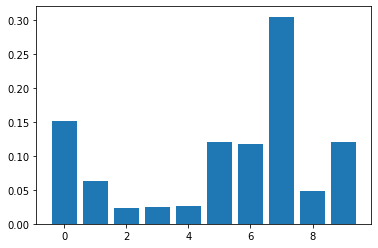

In [144]:
dt.fit(X_train, y_train)
importance = dt.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) 

In [145]:
y_pred_dt=dt.predict(X_test)

In [146]:
score=roc_auc_score(y_test,y_pred_dt)
score

0.6900581281524913

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=3,max_features="sqrt")
rf.fit(x_smt,y_smt)

RandomForestClassifier(max_depth=3, max_features='sqrt')

In [148]:
y_pred_rf=rf.predict(X_test)

In [149]:
score=roc_auc_score(y_test,y_pred_rf)
score

0.796923555598644

In [150]:
import xgboost as xgb

In [151]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.75,n_estimators=100,verbosity=0)
xg.fit(x_smt,y_smt)

# Performance sur le train
train_y_pred_xg = xg.predict(x_smt)
auc = roc_auc_score(y_smt, train_y_pred_xg)
print("Performance of auroc train : ", auc)

# Performance sur le test
test_y_pred_xg = xg.predict(X_test)
auc = roc_auc_score(y_test, test_y_pred_xg)
print("Performance of auroc test : ", auc)

Performance of auroc train :  0.9968132987275995
Performance of auroc test :  0.8294843395189143


In [152]:
confusion_matrix(y_test,xg.predict(X_test))

array([[8636, 1331],
       [ 277, 1058]])

In [157]:
auroc=pd.Series({'XGBoost' : (roc_auc_score(y_test,test_y_pred_xg )),
                 'Decision tree': (roc_auc_score(y_test,y_pred_dt)),
                 'Random Forest': (roc_auc_score(y_test,y_pred_rf)),
                 'KNN': (roc_auc_score(y_test,y_pred_knn)),
                 'Logestic regression': (roc_auc_score(y_test,y_pred_LR))})
auroc

XGBoost                0.829484
Decision tree          0.690058
Random Forest          0.796924
KNN                    0.761457
Logestic regression    0.788134
dtype: float64

Thus XGBoost gives the highest roc_auc_score